In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.offline as py
import plotly.graph_objs as go

In [15]:
df=pd.read_csv("./DataSets/Flights.csv")

In [16]:
df

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58487,12,31,4,AA,SFO,DFW,515,5.0,166.0,1464,1045,-19.0,0,0
58488,12,31,4,F9,LAS,SFO,1910,13.0,71.0,414,2050,4.0,0,0
58489,12,31,4,OO,SFO,SBA,1846,-6.0,46.0,262,1956,-5.0,0,0
58490,12,31,4,WN,MSP,ATL,525,39.0,124.0,907,855,34.0,0,0


In [17]:
df.isnull().sum()

MONTH           0
DAY             0
WEEKDAY         0
AIRLINE         0
ORG_AIR         0
DEST_AIR        0
SCHED_DEP       0
DEP_DELAY     833
AIR_TIME     1018
DIST            0
SCHED_ARR       0
ARR_DELAY    1018
DIVERTED        0
CANCELLED       0
dtype: int64

In [18]:
df.AIRLINE.unique()

array(['WN', 'UA', 'MQ', 'AA', 'F9', 'EV', 'OO', 'NK', 'US', 'AS', 'DL',
       'VX', 'B6', 'HA'], dtype=object)

In [19]:
df.groupby('WEEKDAY')['AIRLINE'].count()

WEEKDAY
1    8720
2    8535
3    8706
4    8659
5    8453
6    7052
7    8367
Name: AIRLINE, dtype: int64

In [20]:
cd=df.groupby('AIRLINE')['DIVERTED','CANCELLED'].sum()
cd

<ipython-input-20-6f51c1d23706>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,DIVERTED,CANCELLED
AIRLINE,,
AA,26,154
AS,0,0
B6,2,1
DL,24,38
EV,15,146
F9,2,10
HA,1,0
MQ,5,152
NK,5,25


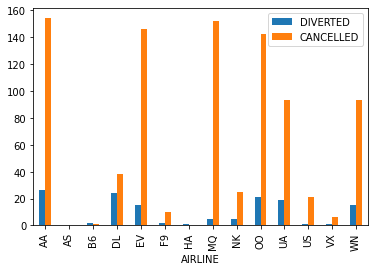

In [21]:
cd.plot(kind='bar')

In [22]:
df.groupby(['AIRLINE','ORG_AIR','DEST_AIR'])['ARR_DELAY','DEP_DELAY'].sum()

<ipython-input-22-6a6b8d8599ba>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



ARR_DELAY  DEP_DELAY
AIRLINE ORG_AIR DEST_AIR                      
AA      ATL     CLT            95.0       88.0
                DFW           451.0      939.0
                LAX           453.0      557.0
                MIA           164.0      211.0
                ORD          -197.0      -46.0
...                             ...        ...
WN      SFO     MKE           216.0      326.0
                PHX           184.0      447.0
                SAN           589.0      898.0
                SNA            55.0      389.0
                STL            74.0      137.0

[2401 rows x 2 columns]

In [23]:
fd=df.groupby('AIRLINE')['CANCELLED','DIST','AIR_TIME'].sum()
fd

<ipython-input-23-a7304f1d7d16>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,CANCELLED,DIST,AIR_TIME
AIRLINE,,,
AA,154,9917696,1257942.0
AS,0,818599,113545.0
B6,1,962132,113083.0
DL,38,9185220,1215507.0
EV,146,2696071,392888.0
F9,10,1276954,166508.0
HA,0,292900,37550.0
MQ,152,1403079,203209.0
NK,25,1587901,201705.0


In [24]:
df.groupby(['AIRLINE','ORG_AIR'])['DEP_DELAY','ARR_DELAY'].mean()

<ipython-input-24-74f046e85808>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



DEP_DELAY  ARR_DELAY
AIRLINE ORG_AIR                      
AA      ATL       7.995652   4.292576
        DEN      10.367442   9.485981
        DFW      11.408569   5.305215
        IAH      13.046632  10.813472
        LAS      10.347709   7.907609
...                    ...        ...
WN      LAS      12.363636   6.851760
        LAX      15.697464  11.192552
        MSP       8.444915  -0.271186
        PHX      12.444121   6.165015
        SFO      11.185714   4.473810

[114 rows x 2 columns]

# 1. AMERICAN AIRLINES(AA) has travelled the most and has the most airtime; although it has the highest count of cancelled flights but in comparision DELTA AIRLINES(DL) which is one of the top airlines in distance travelled and airtime has the least count of canceleed flights making it the most prefred airline,followed by United Airlines.


# 2.Where ATLANTIC SOUTHEAST AIRLINES(EV),AMERICAN EAGLE(MQ),SKYWEST AIRLINES(OO) and,SOUTHWEST AIRLINES(WN) are least prefered as they have a very high no. of cancelled flights compared to their distance travelled.

# 3.ALASKA AIRLINES(AS),HAWAIIAN AIRLINES(HA),VIRGIN AIRLINES(VX),JetBlue AIRWAYS (B6) and,FROINTER AIRLINES(F9) are the airlines having the least no. of cancelled flights; altough these airlines have not travelled a much distance . 

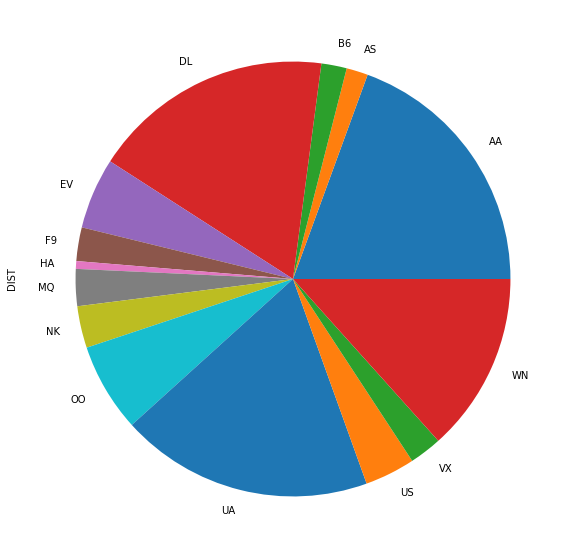

In [25]:
df.groupby('AIRLINE')['DIST'].sum().plot(kind='pie',figsize=(10,10))

In [26]:
df.groupby('AIRLINE')['DEP_DELAY','ARR_DELAY','DIST'].sum()

<ipython-input-26-0f78afe810f3>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,DEP_DELAY,ARR_DELAY,DIST
AIRLINE,,,
AA,98648.0,48332.0,9917696
AS,1389.0,-640.0,818599
B6,7744.0,4694.0,962132
DL,76502.0,3580.0,9185220
EV,52028.0,40076.0,2696071
F9,18718.0,17788.0,1276954
HA,288.0,552.0,292900
MQ,36933.0,22736.0,1403079
NK,29135.0,27396.0,1587901


# 1.AA,WN,and UA are the airlines having the most delayed departure and arrival time despite of having major distance travelled.
*F9 is the airline having a large dealay time compared to the distance travelled thus making it the laest preferable airline

# 2. DL,EV,OO are the major airlines having loess dealay time with major distance travelled.

# 3. AS,US,VX are the airlines having least delay time but have not travelled much distance.

*HA IS THE AIRLINES HAVING LEAST DEALAY TIME AND HAS NOT TRAVELLED MUCH.

# 4. F9,MQ,NK are the airlines having large delay time and has not travelled much making them the least preferable airline. 

# COLLECTIVE RESULT

# DL AND UA    ARE THE MOST EFFICIENT AIRLINES.

# AA,EV,OO ARE MODERATELY PREFFERABLE AIRLINES 

# F9,NK,MQ ARE THE LEAST EFFICIENT AIRLINES

# BUSIEST AIRPORTS IN TAKEOFF AND ARRIVAL 

In [27]:
df.DEST_AIR.value_counts().nlargest(45)


LAX    1991
SFO    1637
ORD    1634
DEN    1581
DFW    1454
LAS    1439
SEA    1356
ATL    1326
PHX    1297
SAN    1085
SLC    1038
JFK    1002
MSP    1001
IAH     946
BOS     944
LGA     931
MCO     926
EWR     921
CLT     915
PHL     914
DTW     837
PDX     706
SNA     694
AUS     683
FLL     679
DCA     673
MIA     670
IAD     606
MCI     588
STL     570
BWI     563
MDW     557
TPA     548
SMF     542
BNA     531
MKE     522
MSY     520
SAT     518
SJC     507
IND     465
OAK     455
CLE     448
CMH     382
OMA     375
CVG     365
Name: DEST_AIR, dtype: int64

In [28]:
df.ORG_AIR.value_counts()

ATL    10413
ORD     8394
DFW     7121
LAX     5889
DEN     5857
PHX     4603
SFO     4402
IAH     4384
LAS     4019
MSP     3410
Name: ORG_AIR, dtype: int64

#   AIRPORTS WITH MOST TAKE OFFS OF PERTICULAR AIRLINE

In [29]:
df.ORG_AIR.unique()

array(['LAX', 'DEN', 'DFW', 'IAH', 'SFO', 'ORD', 'PHX', 'ATL', 'LAS',
       'MSP'], dtype=object)

In [30]:
result=df.groupby('ORG_AIR')

In [32]:
r1=result.get_group('LAX') 
r2=result.get_group('DEN') 
r3=result.get_group('DFW') 
r4=result.get_group('IAH') 
r5=result.get_group('SFO') 
r6=result.get_group('ORD') 
r7=result.get_group('PHX') 
r8=result.get_group('ATL') 
r9=result.get_group('LAS') 
r10=result.get_group('MSP') 


In [174]:
r1.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       LAX         985
AS       LAX         262
B6       LAX         127
DL       LAX         734
F9       LAX          39
HA       LAX          50
MQ       LAX           6
NK       LAX         124
OO       LAX        1133
UA       LAX         817
US       LAX         112
VX       LAX         365
WN       LAX        1135
Name: ORG_AIR, dtype: int64

In [155]:
r2.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       DEN         219
AS       DEN          50
B6       DEN          26
DL       DEN         227
EV       DEN         163
F9       DEN         635
NK       DEN         122
OO       DEN        1310
UA       DEN        1431
US       DEN          65
WN       DEN        1609
Name: ORG_AIR, dtype: int64

In [156]:
r3.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       DFW        4006
AS       DFW          47
B6       DFW          21
DL       DFW         140
EV       DFW         717
F9       DFW          43
MQ       DFW        1570
NK       DFW         269
OO       DFW         107
UA       DFW          93
US       DFW         108
Name: ORG_AIR, dtype: int64

In [157]:
r4.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       IAH         196
AS       IAH           7
DL       IAH          99
EV       IAH        1713
F9       IAH          44
MQ       IAH           2
NK       IAH         141
OO       IAH         443
UA       IAH        1663
US       IAH          76
Name: ORG_AIR, dtype: int64

In [158]:
r5.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       SFO         365
AS       SFO         137
B6       SFO         155
DL       SFO         281
F9       SFO          58
HA       SFO          21
OO       SFO        1047
UA       SFO        1342
US       SFO          71
VX       SFO         480
WN       SFO         445
Name: ORG_AIR, dtype: int64

In [159]:
r6.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       ORD        1496
AS       ORD          52
B6       ORD          73
DL       ORD         222
EV       ORD        1369
F9       ORD         139
MQ       ORD        1833
NK       ORD         286
OO       ORD        1066
UA       ORD        1714
US       ORD         103
VX       ORD          41
Name: ORG_AIR, dtype: int64

In [160]:
r7.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       PHX         879
AS       PHX          64
B6       PHX          19
DL       PHX         225
EV       PHX           1
F9       PHX          54
HA       PHX          19
NK       PHX          39
OO       PHX         546
UA       PHX         176
US       PHX         857
WN       PHX        1724
Name: ORG_AIR, dtype: int64

In [161]:
r8.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       ATL         233
AS       ATL          13
DL       ATL        6620
EV       ATL        1692
F9       ATL         148
MQ       ATL          56
NK       ATL         119
OO       ATL         144
UA       ATL          87
US       ATL          64
WN       ATL        1237
Name: ORG_AIR, dtype: int64

In [162]:
r9.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       LAS         374
AS       LAS         121
B6       LAS         122
DL       LAS         302
F9       LAS         112
HA       LAS          22
NK       LAS         317
OO       LAS          74
UA       LAS         350
US       LAS          87
VX       LAS         107
WN       LAS        2031
Name: ORG_AIR, dtype: int64

In [163]:
r10.groupby('AIRLINE')['ORG_AIR'].value_counts()

AIRLINE  ORG_AIR
AA       MSP         147
AS       MSP          15
DL       MSP        1751
EV       MSP         203
F9       MSP          45
MQ       MSP           4
NK       MSP          99
OO       MSP         718
UA       MSP         119
US       MSP          72
WN       MSP         237
Name: ORG_AIR, dtype: int64

# count of airlines takingoff from every  origin airport 

In [211]:
dd=df.groupby('DEST_AIR')
dd.groups

{'ABE': Int64Index([ 2301,  3377,  5181,  9110,  9683, 10120, 10555, 11672, 11829,
             13186, 13506, 16666, 18301, 19046, 19741, 19893, 20011, 21092,
             24060, 26643, 26784, 26910, 27199, 28167, 28273, 29610, 30024,
             31592, 31596, 31605, 33482, 34971, 35197, 35544, 37112, 37120,
             39797, 41793, 43052, 43459, 43669, 44617, 45896, 47009, 47595,
             48178, 48289, 50271, 50301, 50922, 53082, 54582, 56081, 56213,
             57887],
            dtype='int64'),
 'ABI': Int64Index([  486,  1168,  1571,  2274,  2834,  3544,  3558,  4334,  4606,
              4985,  6159,  6365,  6411,  6750,  6943,  9221,  9657, 10116,
             11643, 11898, 12148, 12913, 14029, 14207, 14344, 14898, 15006,
             17054, 17420, 18071, 20345, 21630, 21794, 22226, 22993, 23210,
             23420, 23710, 24188, 25270, 26251, 27239, 27644, 29226, 29283,
             29596, 32661, 33093, 33241, 33485, 33503, 36603, 37213, 37217,
             39524, 40446

In [256]:
df.groupby('AIRLINE')['DEST_AIR'].max()

AIRLINE
AA    XNA
AS    SLC
B6    SJU
DL    XNA
EV    XNA
F9    TYS
HA    OGG
MQ    XNA
NK    TPA
OO    YUM
UA    TUS
US    TPA
VX    SFO
WN    TUS
Name: DEST_AIR, dtype: object

these are the airlines with most arrivals at the perticular airport

# Collectively LAX,SFO,ORD,DEN,DFW,LAS,SEA,ATL,PHX,SAN,SLC,JFK,MSP ARE THE MOST BUSIEST AIRPORT

In [292]:
dd=df.groupby('DEST_AIR')

In [268]:
d1=dd.get_group('LAX') 
d2=dd.get_group('SFO') 
d3=dd.get_group('ORD') 
d4=dd.get_group('DEN') 
d5=dd.get_group('DFW') 
d6=dd.get_group('LAS') 
d7=dd.get_group('SEA') 
d8=dd.get_group('ATL') 
d9=dd.get_group('PHX') 
d10=dd.get_group('SAN') 
d11=dd.get_group('SLC') 
d12=dd.get_group('JFK') 
d13=dd.get_group('MSP') 


In [289]:
d1.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       LAX         453
DL       LAX         226
F9       LAX          49
NK       LAX          92
OO       LAX         163
UA       LAX         444
US       LAX          48
VX       LAX         124
WN       LAX         392
Name: DEST_AIR, dtype: int64

In [271]:
d2.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       SFO         242
B6       SFO          21
DL       SFO         180
F9       SFO          72
OO       SFO          85
UA       SFO         580
US       SFO          30
VX       SFO         197
WN       SFO         230
Name: DEST_AIR, dtype: int64

In [272]:
d3.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       ORD         508
DL       ORD         172
EV       ORD           4
F9       ORD          67
MQ       ORD          10
NK       ORD         144
OO       ORD          87
UA       ORD         571
US       ORD          31
VX       ORD          40
Name: DEST_AIR, dtype: int64

In [273]:
d4.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       DEN         170
DL       DEN         135
F9       DEN         252
NK       DEN          83
OO       DEN          15
UA       DEN         542
US       DEN          21
WN       DEN         363
Name: DEST_AIR, dtype: int64

In [274]:
d5.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       DFW         961
DL       DFW         121
EV       DFW           3
F9       DFW          23
MQ       DFW           2
NK       DFW         117
OO       DFW         114
UA       DFW          83
US       DFW          30
Name: DEST_AIR, dtype: int64

In [275]:
d6.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       LAS         215
B6       LAS          17
DL       LAS         174
F9       LAS          92
NK       LAS         111
OO       LAS          44
UA       LAS         246
US       LAS          37
VX       LAS         115
WN       LAS         388
Name: DEST_AIR, dtype: int64

In [276]:
d7.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       SEA         131
AS       SEA         504
DL       SEA         177
F9       SEA          19
OO       SEA          96
UA       SEA         212
US       SEA          27
VX       SEA          64
WN       SEA         126
Name: DEST_AIR, dtype: int64

In [277]:
d8.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       ATL         137
DL       ATL         763
EV       ATL          23
F9       ATL          47
MQ       ATL           4
NK       ATL          50
OO       ATL          43
UA       ATL          66
US       ATL          21
WN       ATL         172
Name: DEST_AIR, dtype: int64

In [278]:
d9.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       PHX         321
DL       PHX         101
F9       PHX          45
NK       PHX          27
OO       PHX          91
UA       PHX         135
US       PHX         236
WN       PHX         341
Name: DEST_AIR, dtype: int64

In [279]:
d10.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       SAN         165
DL       SAN          88
F9       SAN          31
NK       SAN          65
OO       SAN         170
UA       SAN         173
US       SAN          31
VX       SAN          45
WN       SAN         317
Name: DEST_AIR, dtype: int64

In [281]:
d11.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       SLC          72
AS       SLC          19
DL       SLC         335
EV       SLC           4
F9       SLC          33
MQ       SLC           1
OO       SLC         306
UA       SLC          48
US       SLC          31
WN       SLC         189
Name: DEST_AIR, dtype: int64

In [284]:
d12.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       JFK         256
B6       JFK         205
DL       JFK         323
UA       JFK          85
US       JFK          18
VX       JFK         115
Name: DEST_AIR, dtype: int64

In [301]:
d13.groupby('AIRLINE')['DEST_AIR'].value_counts()

AIRLINE  DEST_AIR
AA       MSP         113
DL       MSP         458
EV       MSP          19
F9       MSP          27
MQ       MSP           4
NK       MSP          72
OO       MSP          89
UA       MSP         109
US       MSP          17
WN       MSP          93
Name: DEST_AIR, dtype: int64

# count of every airline arriving on the top 13 busiest airports

In [313]:
df.groupby('AIRLINE')['DEST_AIR'].max()

AIRLINE
AA    XNA
AS    SLC
B6    SJU
DL    XNA
EV    XNA
F9    TYS
HA    OGG
MQ    XNA
NK    TPA
OO    YUM
UA    TUS
US    TPA
VX    SFO
WN    TUS
Name: DEST_AIR, dtype: object